In [1]:
! pip install okama

In [2]:
import okama as ok
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from datetime import datetime

In [4]:
one_asset = ok.Asset('TSLA.US')
one_asset

symbol                TSLA.US
name               Tesla, Inc
country                   USA
exchange               NASDAQ
currency                  USD
type             Common Stock
first date            2010-07
last date             2021-05
period length           10.80
dtype: object

In [5]:
one_asset.dividends.tail(10)

2020-08-01    0
2020-09-01    0
2020-10-01    0
2020-11-01    0
2020-12-01    0
2021-01-01    0
2021-02-01    0
2021-03-01    0
2021-04-01    0
2021-05-01    0
Freq: D, Name: TSLA.US, dtype: int64

In [6]:
ok.search('TSLA')

[['TSLA.US', 'TSLA', 'Tesla, Inc', 'USA', 'NASDAQ', 'USD', 'Common Stock'],
 ['TSLAX.US',
  'TSLAX',
  'TRANSAMERICA SMALL CAP VALUE A',
  'USA',
  'NMFQS',
  'USD',
  'FUND'],
 ['mTSLA-USD.CC',
  'mTSLA-USD',
  'Mirrored Tesla',
  'Unknown',
  'CC',
  'USD',
  'Currency'],
 ['TSLA-USD.CC', 'TSLA-USD', 'Tesla', 'Unknown', 'CC', 'USD', 'Currency'],
 ['yTSLA-USD.CC',
  'yTSLA-USD',
  'yTSLA Finance',
  'Unknown',
  'CC',
  'USD',
  'Currency']]

In [9]:
one_asset.wealth_indexes

AttributeError: 'Asset' object has no attribute 'wealth_indexes'

In [18]:
ls = ['TSLA.US', 'AAPL.US']

In [27]:
x = ok.AssetList(ls, ccy='USD')  # first_date and last_date limits the Rate of Return time series
x

symbols          [TSLA.US, AAPL.US]
currency                        USD
first date                  2010-07
last_date                   2021-03
period length    10 years, 9 months
inflation                  USD.INFL
dtype: object

In [28]:
x.names

{'TSLA.US': 'Tesla, Inc', 'AAPL.US': 'Apple Inc'}

In [30]:
x.wealth_indexes

,TSLA.US,AAPL.US,USD.INFL
2010-07,1000.000000,1000.000000,1000.000000
2010-08,817.469920,966.451500,1001.600280
2010-09,856.299741,1128.042191,1002.201240
2010-10,916.497613,1196.514352,1003.403882
2010-11,1482.618189,1236.956537,1003.805243
...,...,...,...
2020-11,119057.009062,15368.197606,1194.126926
2020-12,148023.579367,17129.393052,1195.201640
2021-01,166452.514998,17035.181390,1200.341007
2021-02,141701.026018,15677.477433,1206.942883


In [40]:
x.wealth_indexes.reset_index()

,index,TSLA.US,AAPL.US,USD.INFL
0,2010-07,1000.000000,1000.000000,1000.000000
1,2010-08,817.469920,966.451500,1001.600280
2,2010-09,856.299741,1128.042191,1002.201240
3,2010-10,916.497613,1196.514352,1003.403882
4,2010-11,1482.618189,1236.956537,1003.805243
...,...,...,...,...
124,2020-11,119057.009062,15368.197606,1194.126926
125,2020-12,148023.579367,17129.393052,1195.201640
126,2021-01,166452.514998,17035.181390,1200.341007
127,2021-02,141701.026018,15677.477433,1206.942883


In [45]:
df = x.wealth_indexes
df.index = df.index.to_timestamp()

In [48]:
fig = px.line(df)
fig.show()

In [92]:

tickers = ['AAPL.US', 'TSLA.US']
w = [0.5, 0.5]
y = ok.Portfolio(tickers, ccy='USD', weights=w, last_date=datetime.now(), first_date="2006-01")
y

symbols          [AAPL.US, TSLA.US]
weights                  [0.5, 0.5]
currency                        USD
first date                  2010-07
last_date                   2021-03
period length    10 years, 9 months
dtype: object

In [93]:
y.names

{'AAPL.US': 'Apple Inc', 'TSLA.US': 'Tesla, Inc'}

In [94]:
df_portfolio = y.wealth_index
df_portfolio.index = df_portfolio.index.to_timestamp()

In [95]:
fig_portfolio_wealth = px.line(df_portfolio)
fig_portfolio_wealth.show()

In [96]:
y.describe()

,property,rebalancing,period,portfolio,inflation
0,compound return,1 year,YTD,-0.065758,0.016993
1,CAGR,1 year,1 years,3.126439,0.026334
2,CAGR,1 year,5 years,0.62208,0.021528
3,CAGR,1 year,10 years,0.513778,0.017170
4,CAGR,1 year,10.7 years,0.504222,0.018321
5,CAGR,1 month,10.7 years,0.485573,0.018321
6,CAGR,Not rebalanced,10.7 years,0.499631,0.018321
7,Dividend yield (USD),1 month,LTM,0.003357,NaN
8,Risk,1 month,10.7 years,0.602904,NaN
9,CVAR,1 month,10.7 years,0.150612,NaN


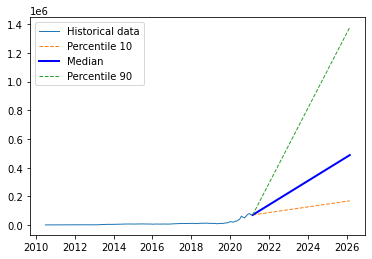

In [102]:
y.plot_forecast(years=5);

In [105]:
y.wealth_index_with_assets

,portfolio,AAPL.US,TSLA.US,USD.INFL
2010-07,1000.000000,1000.000000,1000.000000,1000.000000
2010-08,893.443262,966.451500,817.469920,1001.600280
2010-09,989.354397,1128.042191,856.299741,1002.201240
2010-10,1054.157110,1196.514352,916.497613,1003.403882
2010-11,1397.548788,1236.956537,1482.618189,1003.805243
...,...,...,...,...
2020-11,63793.434199,15368.197606,119057.009062,1194.126926
2020-12,75209.269248,17129.393052,148023.579367,1195.201640
2021-01,79684.220769,17035.181390,166452.514998,1200.341007
2021-02,70584.282757,15677.477433,141701.026018,1206.942883


In [118]:
y.forecast_monte_carlo_returns(n=1000, years=5)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-03,0.008703,-0.129034,-0.020771,0.207248,-0.366933,0.107903,0.078350,0.178432,0.018601,-0.069478,...,-0.058674,0.044367,-0.097363,0.172346,-0.107253,0.009414,-0.121782,0.133210,0.111160,-0.121965
2021-04,0.090661,-0.148543,0.031589,0.024021,0.081918,0.171402,0.071656,-0.088141,-0.029565,-0.044432,...,-0.109674,0.221779,0.043779,0.150047,0.188113,-0.015919,0.002817,-0.076573,-0.012361,-0.007689
2021-05,0.006828,-0.024441,0.047860,-0.044295,-0.111122,0.060731,-0.177391,-0.006403,0.040951,-0.154035,...,-0.001721,-0.045388,0.147374,0.108525,0.125541,-0.146700,0.127185,0.173147,0.166554,0.018671
2021-06,-0.087580,0.090771,0.040363,-0.174826,-0.100127,-0.063467,0.094289,0.062099,0.043253,0.110723,...,0.177071,-0.024284,-0.062934,0.201870,0.176733,-0.038240,-0.020611,0.206782,0.085276,0.266298
2021-07,-0.076959,-0.120615,0.052204,-0.125269,0.062650,-0.054046,0.041831,0.083505,0.127582,0.147866,...,0.038919,0.157894,-0.001138,0.110270,0.000614,-0.169069,0.114807,-0.011401,-0.099547,0.172658
2021-08,0.005458,0.035856,0.069556,0.139788,0.155440,0.158064,0.172230,0.090116,0.045150,0.015954,...,0.240011,0.005385,-0.016351,0.142322,0.159574,0.173559,0.089237,0.029467,-0.075795,-0.057732
2021-09,0.074028,-0.019933,0.091581,-0.040182,0.058954,-0.046209,-0.015289,-0.032728,-0.048067,0.166768,...,0.024344,0.070762,-0.174574,0.049283,0.142726,0.093078,-0.034542,0.057936,0.079532,0.042129
2021-10,0.061301,0.023613,0.058416,0.152847,-0.153315,0.198505,0.151199,-0.007970,0.176858,0.221770,...,-0.059902,0.058455,-0.069184,0.016403,-0.065847,-0.049732,0.021485,-0.038715,0.091316,0.168257
2021-11,0.060184,-0.046397,0.061974,0.045105,-0.160569,0.157762,0.274396,0.011163,0.014186,0.200769,...,0.055575,-0.172220,0.073485,0.102796,-0.079776,-0.016632,0.083938,-0.038651,-0.022386,0.016330
2021-12,-0.027293,-0.054304,-0.016263,0.081073,0.178069,0.155461,-0.068639,0.065576,0.175549,0.045381,...,-0.055613,0.044607,0.217154,0.119283,-0.058377,0.066095,-0.036708,-0.063456,0.038042,0.159506


In [137]:
tickers = ['AAPL.US', 'TSLA.US', 'SPCE.US']
x = ok.EfficientFrontier(tickers)

In [138]:
x

symbols          [AAPL.US, TSLA.US, SPCE.US]
currency                                 USD
first date                           2017-10
last_date                            2021-03
period length              3 years, 6 months
inflation                           USD.INFL
dtype: object

In [159]:
mc = x.get_monte_carlo(n=1000, kind='CAGR')

In [160]:
mc

,CAGR,Risk
0,0.698389,1.016531
1,0.692120,0.934249
2,0.696687,1.011515
3,0.636273,0.782420
4,0.575371,0.953656
...,...,...
995,0.351243,1.395448
996,0.529871,0.684702
997,0.677577,1.228639
998,0.423487,0.981466


In [161]:
from matplotlib import pyplot as plt

In [164]:
ef = x.ef_points

In [165]:
ef

,Risk,Mean return,CAGR,AAPL.US,SPCE.US,TSLA.US
0,0.475055,0.479015,0.407993,1.000000,9.188093e-09,0.000000e+00
1,0.459442,0.518290,0.453470,0.853703,1.462971e-01,5.551115e-17
2,0.489012,0.558519,0.487732,0.797327,1.521450e-01,5.052777e-02
3,0.524905,0.599722,0.521229,0.745546,1.508161e-01,1.036374e-01
4,0.566885,0.641923,0.553970,0.693765,1.494887e-01,1.567465e-01
5,0.614784,0.685141,0.585905,0.641983,1.481610e-01,2.098558e-01
6,0.668453,0.729400,0.616986,0.590202,1.468331e-01,2.629651e-01
7,0.727783,0.774722,0.647166,0.538330,1.456462e-01,3.160237e-01
8,0.792716,0.821130,0.676399,0.486613,1.442184e-01,3.691689e-01
9,0.863247,0.868649,0.704639,0.434853,1.428565e-01,4.222904e-01


Text(0, 0.5, 'Return')

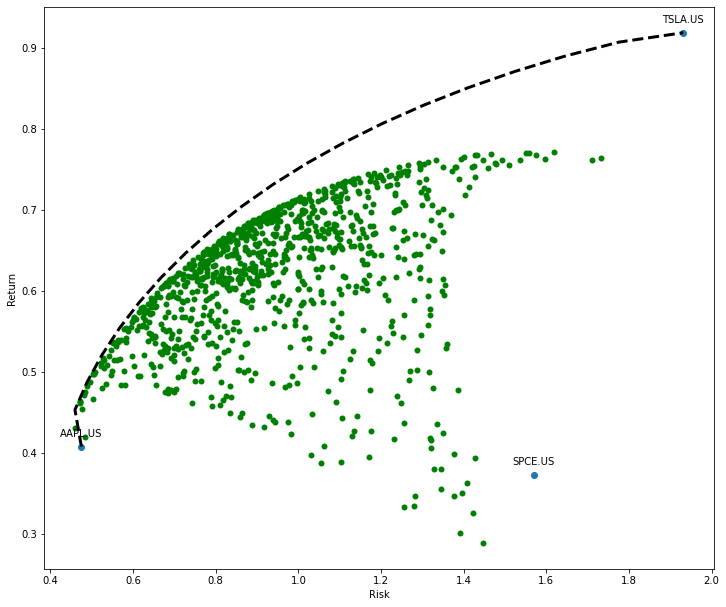

In [196]:
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.2, top=1.5)
ok.Plots(tickers, ccy='USD').plot_assets(kind='cagr')
ax = plt.gca()
ax.plot(ef.Risk, ef.CAGR, linestyle='dashed', linewidth=3, color='black')
ax.scatter(mc.Risk, mc.CAGR, color='green', linewidth=0)
plt.xlabel('Risk')
plt.ylabel('Return')

<AxesSubplot:xlabel='Risk (volatility)', ylabel='Weights of assets'>

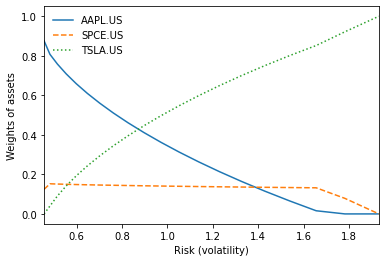

<Figure size 864x432 with 0 Axes>

In [185]:
ok.Plots(tickers, ccy='USD').plot_transition_map(cagr=False)

In [184]:
ef

,Risk,Mean return,CAGR,AAPL.US,SPCE.US,TSLA.US
0,0.475055,0.479015,0.407993,1.000000,9.188093e-09,0.000000e+00
1,0.459442,0.518290,0.453470,0.853703,1.462971e-01,5.551115e-17
2,0.489012,0.558519,0.487732,0.797327,1.521450e-01,5.052777e-02
3,0.524905,0.599722,0.521229,0.745546,1.508161e-01,1.036374e-01
4,0.566885,0.641923,0.553970,0.693765,1.494887e-01,1.567465e-01
5,0.614784,0.685141,0.585905,0.641983,1.481610e-01,2.098558e-01
6,0.668453,0.729400,0.616986,0.590202,1.468331e-01,2.629651e-01
7,0.727783,0.774722,0.647166,0.538330,1.456462e-01,3.160237e-01
8,0.792716,0.821130,0.676399,0.486613,1.442184e-01,3.691689e-01
9,0.863247,0.868649,0.704639,0.434853,1.428565e-01,4.222904e-01


In [191]:
tickers

['AAPL.US', 'TSLA.US', 'SPCE.US']

In [193]:
fig_transition_map_test = go.Figure()
for ticker in tickers:
    fig_transition_map_test.add_trace(
        go.Scatter(
            x=ef.Risk,
            y=ef[ticker],
            mode='lines',
            # line=dict(width=4),
            name=ticker
        ))

fig_transition_map_test.update_layout(
                    title='Weights of stocks',
                    xaxis_title='Risk (Volatility)',
                    yaxis_title='Weights'
                )
fig_transition_map_test.show()